In [1]:
import numpy as np
import pandas as pd
import datetime
from scipy.sparse import csr_matrix

In [2]:
df = pd.read_csv("rideshare_kaggle.csv")

In [3]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [5]:
df.dropna(inplace=True)

In [6]:
df["long_summary"].value_counts()

long_summary
 Mostly cloudy throughout the day.                      186262
 Partly cloudy throughout the day.                      133744
 Light rain in the morning.                              94423
 Rain throughout the day.                                49929
 Light rain in the morning and overnight.                46575
 Rain until morning, starting again in the evening.      44071
 Foggy in the morning.                                   41201
 Light rain until evening.                               32690
 Overcast throughout the day.                             6906
 Possible drizzle in the morning.                         1708
 Rain in the morning and afternoon.                        467
Name: count, dtype: int64

In [7]:
df["price"].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [8]:
df["sunriseTime"].value_counts()

sunriseTime
1543405938    21715
1543405936    18975
1543233003    18122
1544875681    17225
1544702792    15529
              ...  
1544356962      822
1545134992      584
1543146535      390
1544357003      141
1543146539       77
Name: count, Length: 110, dtype: int64

In [9]:
conditions = [(df['price'] <= 10),((df['price'] > 10) & (df['price'] <= 30)),(df['price'] > 30)]

values = ['Low', 'Moderate', 'High']


df["price_encoded"] = np.select(conditions, values, default="Unknown")

In [10]:
df["price_encoded"].value_counts()

price_encoded
Moderate    384420
Low         196750
High         56806
Name: count, dtype: int64

In [11]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["sunriseTime"] = df["sunriseTime"].apply(lambda x: datetime.datetime.fromtimestamp(x))
df["sunsetTime"] = df["sunsetTime"].apply(lambda x: datetime.datetime.fromtimestamp(x))

def set_noon_time(dt):
    return dt.replace(hour=12, minute=0, second=0)

def set_night_time(dt):
    return dt.replace(hour=23, minute=59, second=59)

conditions = [(df['datetime'] <= df["sunriseTime"]),
 ((df['datetime'] > df["sunriseTime"]) & (df['datetime'] <= (df['datetime'].apply(set_noon_time)))),
 ((df['datetime'] > (df['datetime'].apply(set_noon_time))) & (df['datetime'] <= df["sunsetTime"])),
 ((df['datetime'] > df["sunsetTime"]) & (df['datetime'] <= (df['datetime'].apply(set_night_time))))]

values = ['Early Morning Ride', 'Morning Ride', 'Afternoon Ride', 'Night Ride']


df["datetime_encoded"] = np.select(conditions, values, default="Unknown")

In [12]:
df["datetime_encoded"].value_counts()

datetime_encoded
Afternoon Ride        250471
Early Morning Ride    175513
Morning Ride          136316
Night Ride             75676
Name: count, dtype: int64

In [13]:
df["distance"].describe()

count    637976.000000
mean          2.189261
std           1.135413
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64

In [14]:
conditions = [(df['distance'] <= 1.5),((df['distance'] > 1.5) & (df['distance'] <= 3)),(df['distance'] > 3)]

values = ['Short Distance Travel', 'Medium Distance Travel', 'Long Distance Travel']


df["distance_encoded"] = np.select(conditions, values, default="Unknown")

In [15]:
df["distance_encoded"].value_counts()

distance_encoded
Medium Distance Travel    270146
Short Distance Travel     221508
Long Distance Travel      146322
Name: count, dtype: int64

In [16]:
df["name"].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [17]:
df["cab_type"].value_counts()

cab_type
Uber    330568
Lyft    307408
Name: count, dtype: int64

In [18]:
df["total_text_info"] = (df['long_summary']+df['datetime_encoded']+". "+df['distance_encoded']+". "+df['cab_type']+" "+df['name']+".")

In [19]:
df = df[["total_text_info","price_encoded"]]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

tfidf = TfidfVectorizer(stop_words='english',ngram_range = (1,1))
text_tfidf = tfidf.fit_transform(df['total_text_info'])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_tfidf, df['price_encoded'], test_size=0.2, random_state=0)

train_dataset_label_counts = Counter(Y_train)
test_dataset_label_counts = Counter(Y_test)

print(f"Train dataset: {len(Y_train)} samples, {train_dataset_label_counts}")
print(f"Test dataset: {len(Y_test)} samples, {test_dataset_label_counts}")

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

from sklearn import metrics
predicted = model.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Train dataset: 510380 samples, Counter({'Moderate': 307605, 'Low': 157174, 'High': 45601})
Test dataset: 127596 samples, Counter({'Moderate': 76815, 'Low': 39576, 'High': 11205})
Accuracuy Score:  0.8672764036490173


In [21]:
text_tfidf

<637976x33 sparse matrix of type '<class 'numpy.float64'>'
	with 6407835 stored elements in Compressed Sparse Row format>

In [22]:
X_test_list = X_test.todense().tolist()
Y_test_list = Y_test.tolist()



df_output = pd.DataFrame()
df_output["input_text"] = X_test_list
df_output["actual_output"] = Y_test_list
df_output['predicted_output'] = predicted


In [23]:
df_output

,input_text,actual_output,predicted_output
0,"[0.4072471696935114, 0.44211450603698044, 0.35...",Moderate,Moderate
1,"[0.0, 0.0, 0.0, 0.0, 0.13269066691117265, 0.0,...",Moderate,Moderate
2,"[0.0, 0.0, 0.26455882208944514, 0.238965955470...",Low,Low
3,"[0.32676442036220077, 0.0, 0.0, 0.0, 0.1690371...",Moderate,Moderate
4,"[0.31930630153772804, 0.34664439260582297, 0.2...",High,High
...,...,...,...
127591,"[0.0, 0.0, 0.0, 0.0, 0.16289238853466234, 0.0,...",Low,Low
127592,"[0.0, 0.39239540281784185, 0.315988210788304, ...",Moderate,Moderate
127593,"[0.0, 0.0, 0.3180168465630293, 0.2872525625654...",Low,Low
127594,"[0.0, 0.3946935015490363, 0.0, 0.2870917615086...",Moderate,Moderate


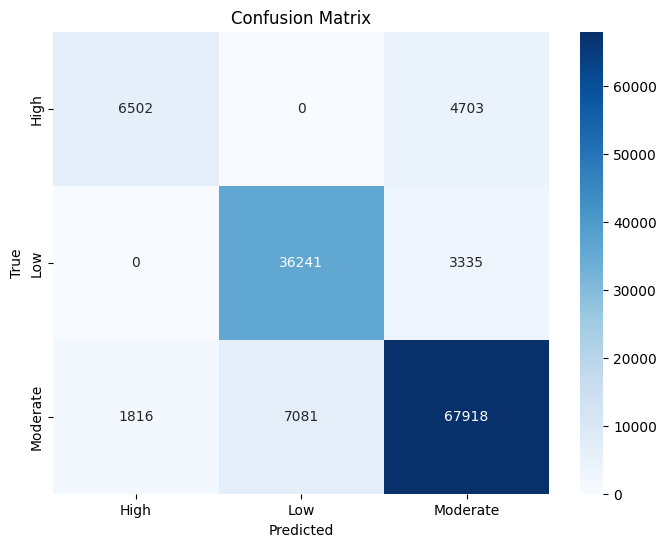

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(df_output["actual_output"], df_output['predicted_output'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=('High','Low','Moderate') , yticklabels=('High','Low','Moderate'))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()